In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from mcmc import MCMC

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

datadir = os.path.join(basedir, 'data')

binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')

    # The for loop is to allow for the option of plotting multiple chains on the same chart
    # (It just kinda looks cool)
print(f"Starting Markov Chain")
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
g_cov_test = np.diag([.01, .01, .1, .01])
markov_chain = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=g_cov_test)

markov_chain.make_chain(10000)

print(markov_chain.chain)

Starting Markov Chain
[[ 3.49047872e-01  1.75641760e-01  5.05115849e+01 -2.36047256e+01]
 [ 4.01934914e-01  8.63770967e-02  5.02168020e+01 -2.34661075e+01]
 [ 2.98282195e-01  1.67183111e-02  5.02566513e+01 -2.35818411e+01]
 ...
 [ 2.26782004e-01  5.40214109e-01  5.77074064e+01 -1.97126346e+01]
 [ 2.34651231e-01  7.54735804e-01  5.82534185e+01 -1.97566422e+01]
 [ 3.13711285e-01  7.27906162e-01  5.81571922e+01 -1.97336190e+01]]


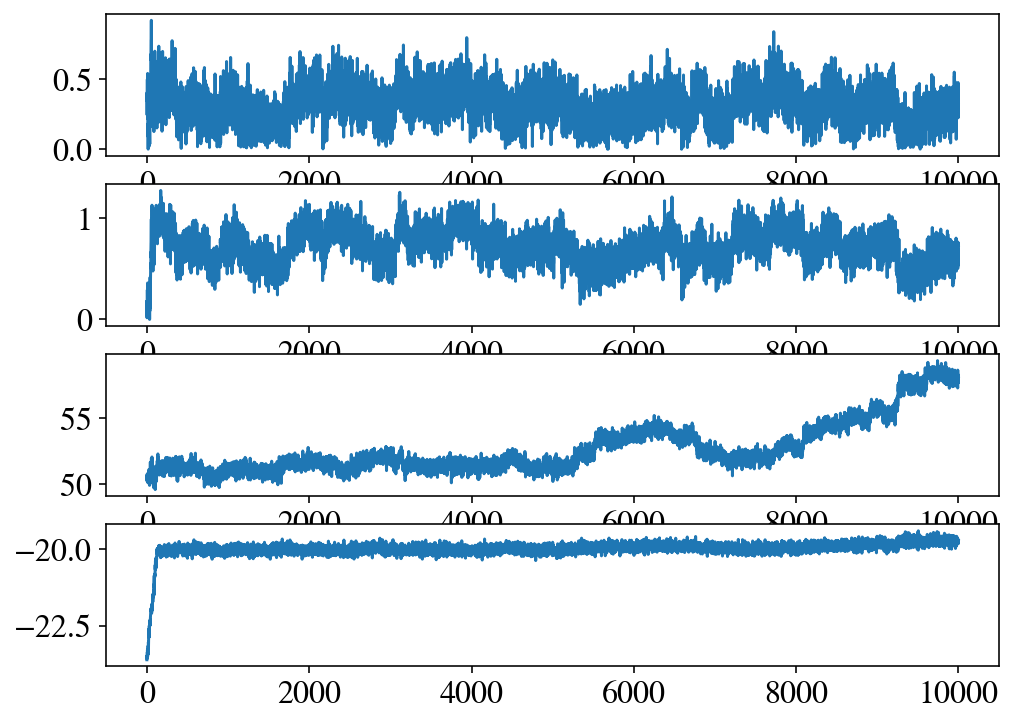

In [4]:
fig, ax = plt.subplots(4,1)

ax[0].plot(markov_chain.Omega_m)
ax[1].plot(markov_chain.Omega_L)
ax[2].plot(markov_chain.H0)
ax[3].plot(markov_chain.M)
plt.show()

In [11]:
x = markov_chain.chain
print(x, type(x))
print(x.T, type(x.T))
cov = np.cov(markov_chain.chain.T)
alpha= .1
cov*=alpha
print(cov)

[[ 3.49047872e-01  1.75641760e-01  5.05115849e+01 -2.36047256e+01]
 [ 4.01934914e-01  8.63770967e-02  5.02168020e+01 -2.34661075e+01]
 [ 2.98282195e-01  1.67183111e-02  5.02566513e+01 -2.35818411e+01]
 ...
 [ 2.26782004e-01  5.40214109e-01  5.77074064e+01 -1.97126346e+01]
 [ 2.34651231e-01  7.54735804e-01  5.82534185e+01 -1.97566422e+01]
 [ 3.13711285e-01  7.27906162e-01  5.81571922e+01 -1.97336190e+01]] <class 'numpy.ndarray'>
[[ 3.49047872e-01  4.01934914e-01  2.98282195e-01 ...  2.26782004e-01
   2.34651231e-01  3.13711285e-01]
 [ 1.75641760e-01  8.63770967e-02  1.67183111e-02 ...  5.40214109e-01
   7.54735804e-01  7.27906162e-01]
 [ 5.05115849e+01  5.02168020e+01  5.02566513e+01 ...  5.77074064e+01
   5.82534185e+01  5.81571922e+01]
 [-2.36047256e+01 -2.34661075e+01 -2.35818411e+01 ... -1.97126346e+01
  -1.97566422e+01 -1.97336190e+01]] <class 'numpy.ndarray'>
[[ 1.66256626e-03  1.04101081e-03 -5.17032412e-03 -2.69402066e-04]
 [ 1.04101081e-03  2.87118743e-03 -8.56199170e-03  2.009

In [12]:
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
markov_chain2 = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=cov)

markov_chain2.make_chain(10000)

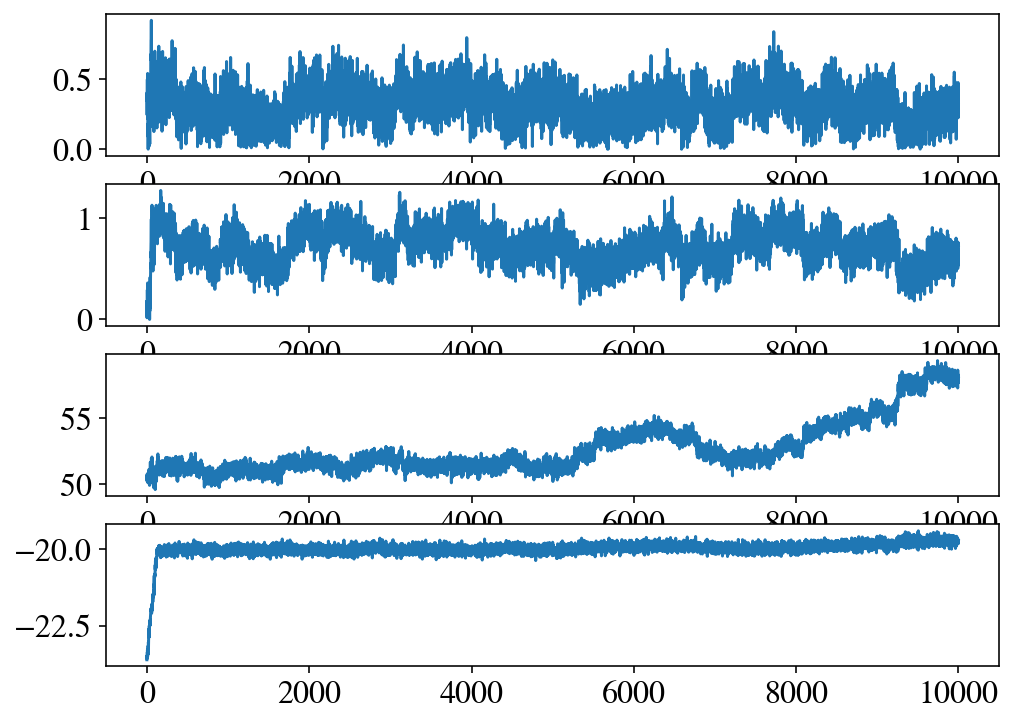

In [13]:
fig, ax = plt.subplots(4,1)
ax[0].plot(markov_chain.Omega_m)
ax[1].plot(markov_chain.Omega_L)
ax[2].plot(markov_chain.H0)
ax[3].plot(markov_chain.M)
plt.show()

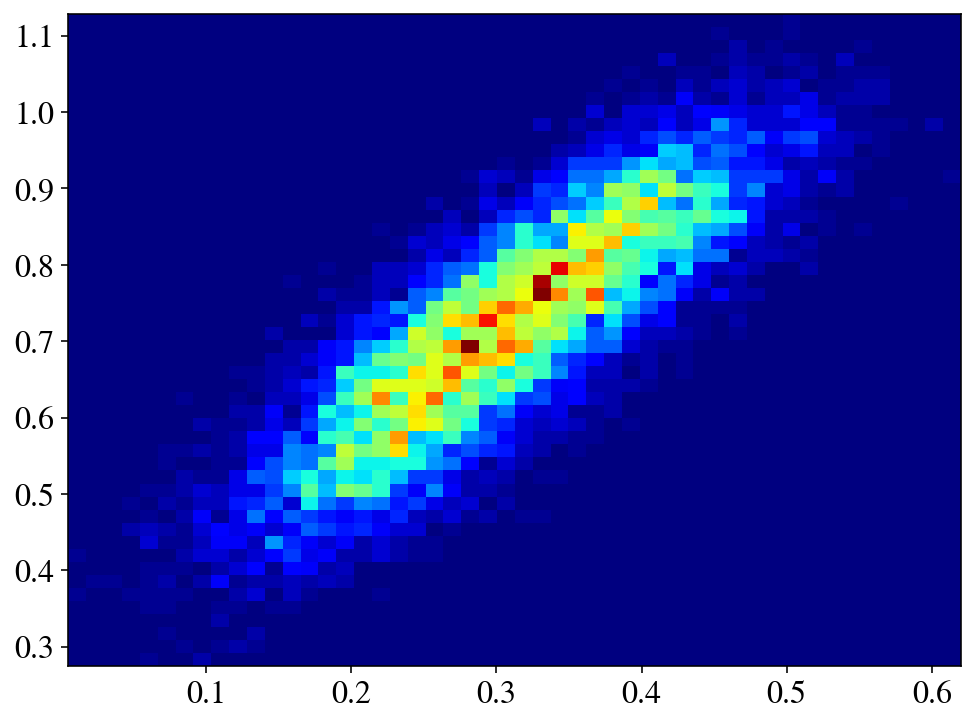

In [14]:
plt.hist2d(markov_chain2.chain[500:,0], markov_chain2.chain[500:,1], bins=(50, 50), cmap=plt.cm.jet)
plt.show()